In [1]:
using HierarchicalDriving
import POMDPs:initial_state
using POMDPToolbox
using Interact
using MCTS
using AutoViz
import ParticleFilters: obs_weight

In [2]:
HORIZON = 10
TIME_STEP = 0.3
lb_x = (AVG_HWY_VELOCITY - 5.0) * TIME_STEP * HORIZON
ub_x = (AVG_HWY_VELOCITY + 5.0) * TIME_STEP * HORIZON
p = LowLevelMDP(0.99,TIME_STEP, HORIZON,
                            HierarchicalDriving.RoadSegment((-100.0, 500.0),[0.0, LANE_WIDTH, 2.0 * LANE_WIDTH, 3.0 * LANE_WIDTH, 4.0 * LANE_WIDTH]),
                            CarPhysicalState((0.0, 1.0 * LANE_WIDTH/2.0, AVG_HWY_VELOCITY)),
                            (CarPhysicalState((lb_x, 1.0 * LANE_WIDTH/2.0 - 0.5, AVG_HWY_VELOCITY - 5)),
                             CarPhysicalState((ub_x, 1.0 * LANE_WIDTH/2.0 + 0.5, AVG_HWY_VELOCITY + 5))),
                            50.0, -500.0, -2.0, -5.0, -5.0, -1.0, HierarchicalDriving.getFrameList());


Interact.Options{:SelectionSlider,Int64}(1: "input" = 6 Int64 ,"i",6,"6",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

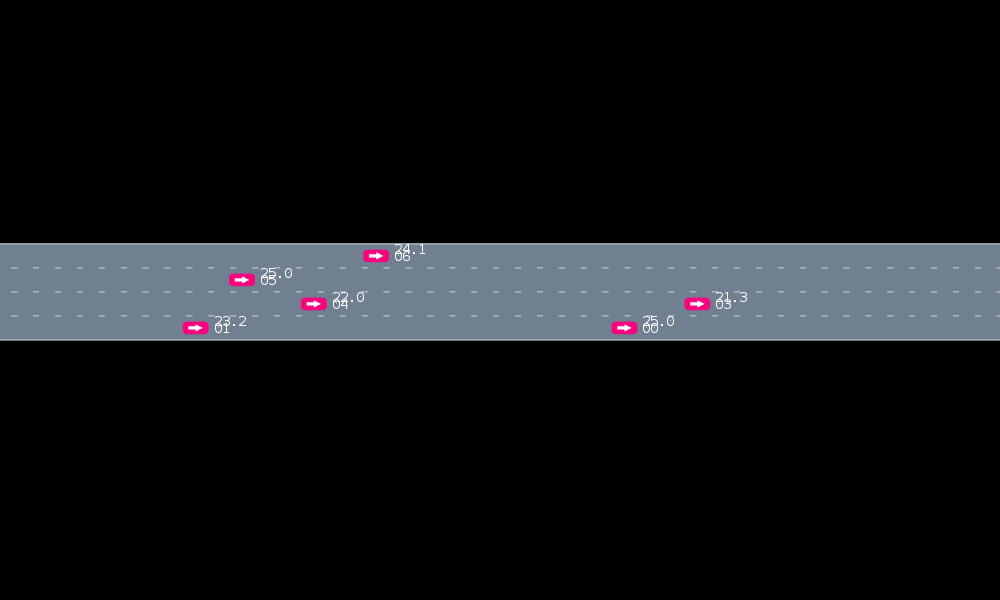

In [3]:
i = 17
#policy = RandomPolicy(p)
policy = subintentional_policy(p)
hr = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
hist = simulate(hr, p, policy)
@manipulate for i in 1:n_steps(hist)+1
    (p,state_hist(hist)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 6 Int64 ,"i",6,"6",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

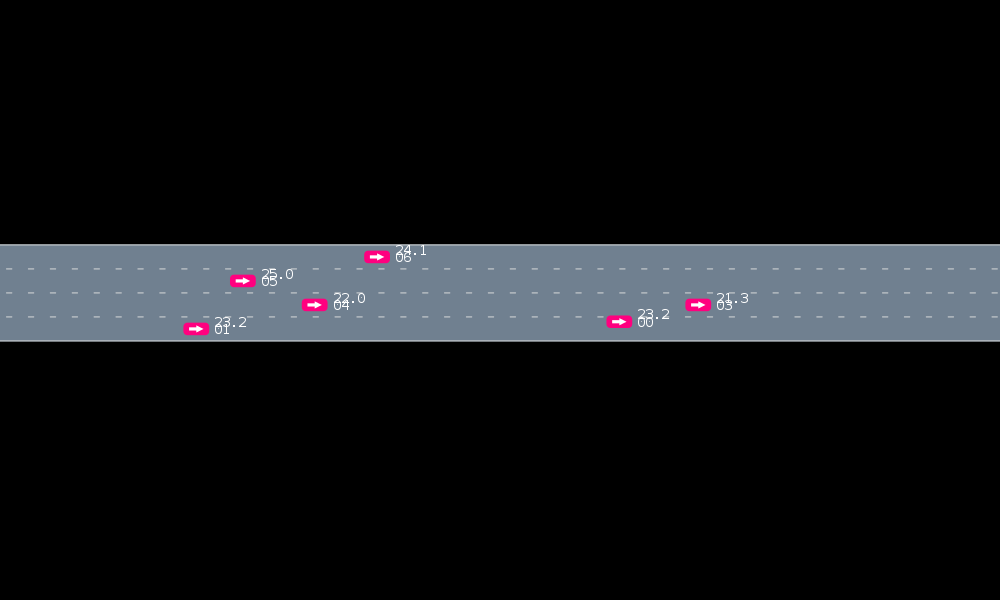

In [4]:
solver = DPWSolver(depth=p.HORIZON,
                           exploration_constant=10.0,
                           n_iterations=1_500,
                           k_action=10.0,
                           alpha_action=1/10,
                           k_state=5.0,
                           alpha_state=1/10,

                          )
policy1 = solve(solver, p)
hr1 = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
hist1 = simulate(hr1, p, policy1)
@manipulate for i in 1:n_steps(hist1)+1
    (p,state_hist(hist1)[i])
end

In [5]:
discounted_reward(hist)

45.67586237418204

In [6]:
discounted_reward(hist1)

34.123558845652454

In [3]:
function testing()
    n = 100
    sum = 0.0
    sum1 = 0.0
    numPositiveRnd = 0
    numPositiveMCTS = 0
    for i in 1:n
        #policy = RandomPolicy(p)
        policy = subintentional_policy(p)
        hr = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
        hist = simulate(hr, p, policy)

        solver = DPWSolver(depth=p.HORIZON,
                               exploration_constant=10.0,
                               n_iterations=1_500,
                               k_action=10.0,
                               alpha_action=1/10,
                               k_state=10.0,
                               alpha_state=1/10,
                               estimate_value=RolloutEstimator(subintentional_policy(p))
                              )
        policy1 = solve(solver, p)
        hr1 = HistoryRecorder(max_steps = p.HORIZON, rng = MersenneTwister(i))
        hist1 = simulate(hr1, p, policy1)

        println(i, ",", discounted_reward(hist), ",", discounted_reward(hist1))
        sum += discounted_reward(hist)
        sum1+= discounted_reward(hist1)
        if discounted_reward(hist)>0
            numPositiveRnd += 1
        end
        if discounted_reward(hist1)>0
            numPositiveMCTS += 1
        end
    end
    println("Mean: ",sum/n,",", sum1/n)
    println("Success Rate: ", numPositiveRnd/n, ",", numPositiveMCTS/n)
end

testing (generic function with 1 method)

In [ ]:
@time testing()

1,45.67586237418204,33.44362786146521
2,45.67586237418204,36.89047805274641
3,45.67586237418204,35.73776284074641
4,45.67586237418204,24.69510227571395
5,45.67586237418204,38.0089564702348
6,45.67586237418204,34.5506943983548
7,45.67586237418204,36.89047805274641
8,45.67586237418204,35.73776284074641
9,45.67586237418204,36.90223925274641
10,45.67586237418204,34.16909686021894
11,45.67586237418204,38.06659805274641
12,45.67586237418204,36.86753902002761
13,45.67586237418204,33.00473806021895
14,45.67586237418204,34.57340404074641
15,45.67586237418204,36.89047805274641
16,45.67586237418204,36.90223925274641
17,45.67586237418204,27.14318237155775
18,45.67586237418204,34.58493119286641
19,45.67586237418204,35.726119252746415
20,45.67586237418204,36.46403764565245
21,45.67586237418204,31.90943038285056
22,45.67586237418204,34.16909686021894
23,45.67586237418204,35.726119252746415
24,45.67586237418204,34.157453272218945
25,45.67586237418204,34.57340404074641
26,45.67586237418204,36.844597670